# July 24th, 2018
## Benjamin Adam Catching
## Andino Lab, Summer Rotation
## Polio DIPs Project

Continue working on the mice_video script. Get mouse segmentation automated.

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# Import the mice segmentation script
from tools import mice_video

In [3]:
# Directory of mice videos
mice_vid_dir = 'data/mouse_videos/'

In [4]:
# Get all videos in the directory
mice_videos = glob.glob(mice_vid_dir + '*.h264')

In [5]:
# Look at the contents of mice_videos
mice_videos

['data/mouse_videos/Test3_2black_rr.h264']

In [6]:
# Test to make the mice_video object
K = np.array([[1000.0, 0.0, 910.0],
          [0., 1000.0, 100.0],
          [0.0, 0.0, 1.0]])
D = np.array([np.array([[0.00001], 
                        [0.31307765215775184], 
                        [-0.4104704724832258], 
                        [0.15343014605793324]])])
test_mouse_video = mice_video.MouseVideoProcess(mice_videos[0], 
                                                num_frames=1440, 
                                                distort_param=[K, D])

In [8]:
# Make segmented images
test_mouse_segment = test_mouse_video.rough_segment()

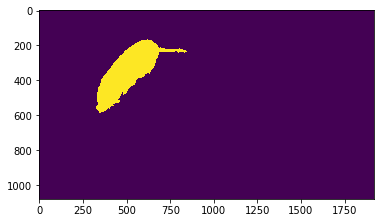

In [16]:
test_frame = test_mouse_segment[600]
plt.imshow(test_frame.T)
plt.show()

The time and memory used to create the segmented images may make this method unusable. Perhaps saving the images to files and dumping the image memory after each segmentation would be a more efficient way to process the images.

In [17]:
# Save images
import scipy.misc
for i, frame in enumerate(test_mouse_segment):
    # Create num string
    str_num = str(i)
    str_num_len = len(str_num)
    new_str_num = '0' * (4 - str_num_len) + str_num
    file_name = 'data/mouse_videos/thresh_video/seg_mice' + new_str_num + '.png'
    scipy.misc.imsave(file_name, frame)